# Load Libraries Test

#### test on import and from

In [1]:
# from : file, import : class
from settings import settings

In [2]:
# test
settings.MyCompanies

['INTC', 'AAPL', 'AMD', 'NVDA']

In [3]:
settings.API

'yahoo'

# Load Libraries

In [4]:
from settings import settings
from object_factory import object_factory
from mappers import portfolios_allocation_mapper

In [5]:
settings.MyCompanies

['INTC', 'AAPL', 'AMD', 'NVDA']

# Generate optimum portfolio. Run all functions step by steps

In [6]:
def generate_optimum_portfolio():
    
    #instantiate the objects with the settings
    
    # function lists
    obj_factory = object_factory(settings)
    
    # call functions
    ce = obj_factory.get_companies_extractor() # get companies info
    cp = obj_factory.get_charts_plotter() # get stock charts over given time horizon
    mc = obj_factory.get_metrics_calculator()
    
    print('0. Get companies')
    companies = ce.get_companies_list()
    print(companies)
    
    price_extractor = obj_factory.get_price_extractor(companies)
#     print(price_extractor)
    
    print('1. Get company stock prices')
    
    end_date = settings.get_end_date()
    start_date = settings.get_start_date(end_date)
    closing_prices = price_extractor.get_prices(settings.PriceEvent, start_date, end_date)
#     print(end_date)
#     print(start_date)
    
    print('2. Plot stock charts')
    #plot stock prices & save data to a file
#     print(closing_prices)
    cp.plot_prices(closing_prices)
    
    print('3. Calculate Daily Returns')
    returns = settings.DailyAssetsReturnsFunction(closing_prices)
    # plot stock daily changes
#     print(returns)
    cp.plot_returns(returns)
    
    print('3.1 Calculate Expected Returns : Cumulative value for 1$ investment')
    # calculate cagr
    cum_return = settings.DailyAssetsCumulativeReturnsFunction(returns)
#     print(cum_return)
    # plot 1$ expected cumulative growth
    cp.plot_cum_daily_return(cum_return)
    
    print('3.2 Calculate Expected Mean Return from daily changes')
    print('To see relation with cumulative value. Getting annual expected return to the power of years of duration.')
    expected_returns = settings.AssetsExpectedReturnsFunction(returns)
#     print(expected_returns)
    cp.plot_expected_returns(expected_returns)
#     print(expected_returns.index)
    
    print('4. Calculate covariance for efficient edge quantification')
    # covariance will be used for optimization after 5
    covariance = settings.AssetsCovarianceFunction(returns)
#     print(covariance)
    
    print('4.1 Visualize daily returns correlation : Scatter')
    cp.plot_correlation_scatter(returns)
#     print(returns.corr())
    
    print('4.2 Calculate daily change correlation coefficiencies : Matrix')
    cp.plot_correlation_matrix(returns)
    
    print('5 Use an optimiser')
    #generate portfolios
    targets = settings.get_my_targets()
    # expected_returns.index returns tickers
    optimiser = obj_factory.get_optimiser(targets, len(expected_returns.index))
    portfolios_allocations_df = optimiser.generate_portfolios(expected_returns, covariance, settings.RiskFreeRate)
#     print(portfolios_allocations_df)
    portfolio_risk_return_ratio_df = portfolios_allocation_mapper.map_to_risk_return_ratios(portfolios_allocations_df)
    
    portfolio_risk_return_allc_ratio_df = portfolios_allocation_mapper.map_to_risk_return_allc_ratio(portfolios_allocations_df)
#     print(portfolio_risk_return_ratio_df)
#     print(portfolio_risk_return_allc_ratio_df)
    min_risk = mc.get_min_risk(portfolio_risk_return_allc_ratio_df)
    max_sr = mc.get_max_sharpe_ratio(portfolio_risk_return_allc_ratio_df)
     
    #plot efficient frontiers
    cp.plot_efficient_frontier(portfolio_risk_return_ratio_df, min_risk, max_sr)
    
    print('5.1 Allocation for Mar Sharpe and Min Volatility')
    cp.plot_pie(max_sr, min_risk)
    
    print('6 Add random data by monte carlo')
    # generate portfolios with allocations

# Execute everything

0. Get companies
  Ticker
0   INTC
1   AAPL
2    AMD
3   NVDA
--> Initialised Price Extractor
1. Get company stock prices
--> Fetched prices for: INTC
--> Fetched prices for: AAPL
--> Fetched prices for: AMD
--> Fetched prices for: NVDA
2. Plot stock charts


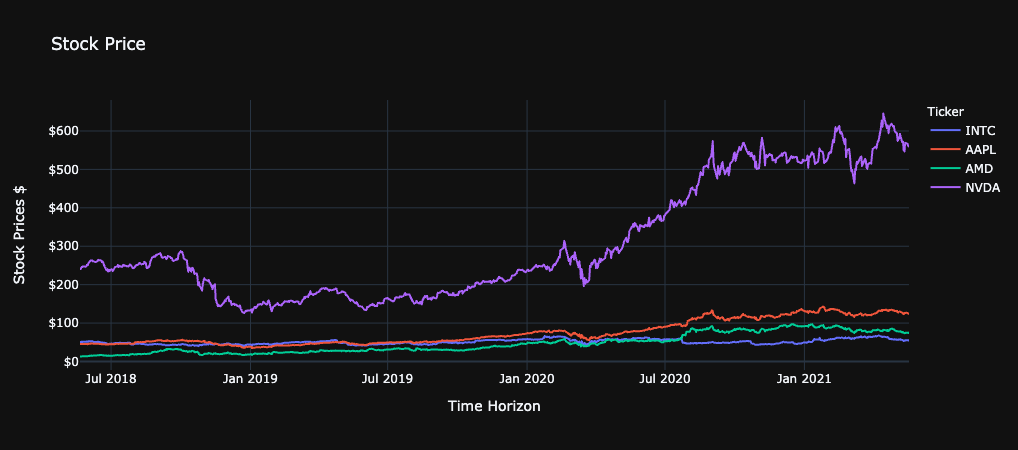

3. Calculate Daily Returns


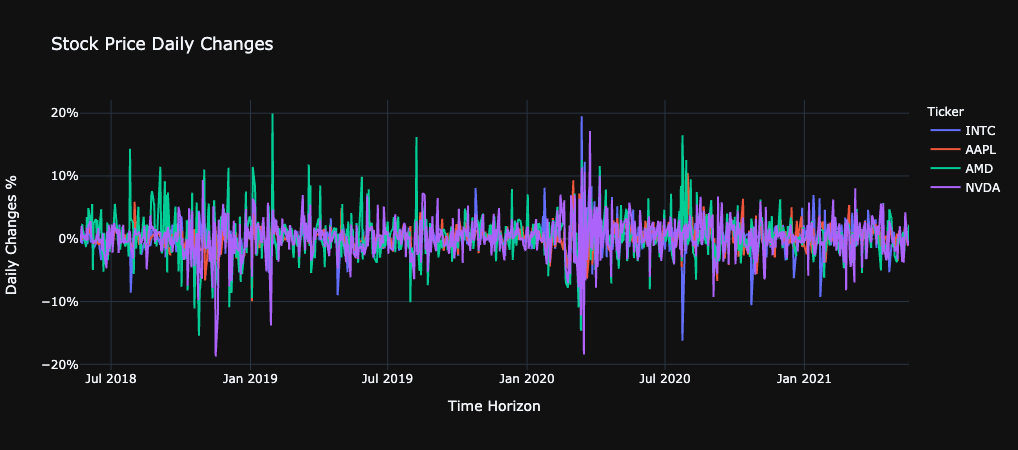

3.1 Calculate Expected Returns : Cumulative value for 1$ investment


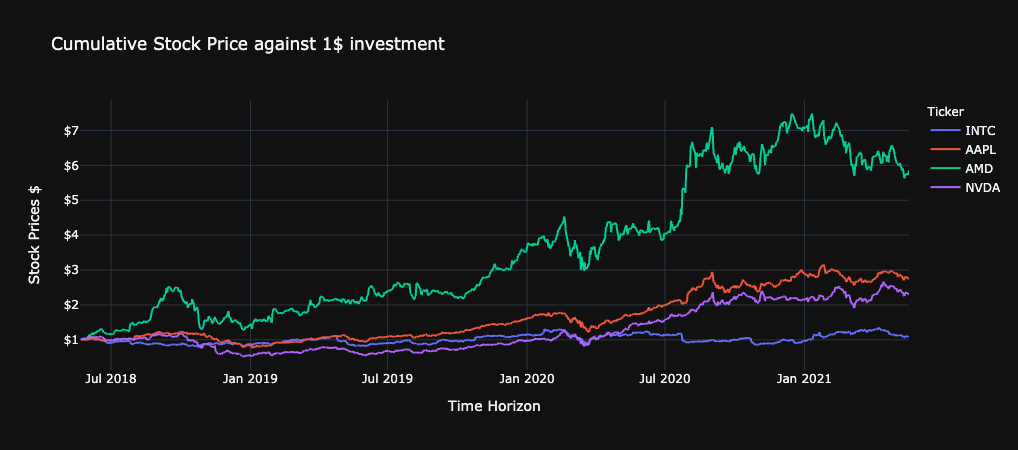

3.2 Calculate Expected Mean Return from daily changes
To see relation with cumulative value. Getting annual expected return to the power of years of duration.


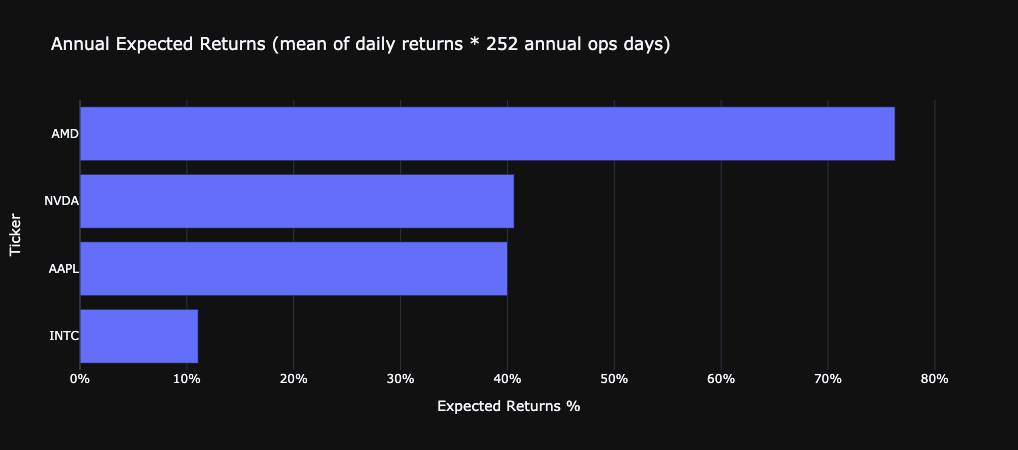

4. Calculate covariance for efficient edge quantification
4.1 Visualize daily returns correlation : Scatter


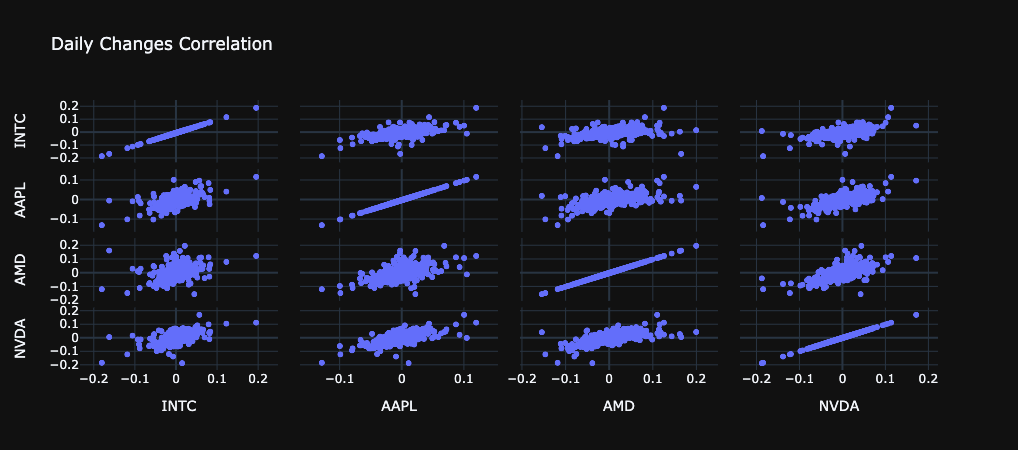

4.2 Calculate daily change correlation coefficiencies : Matrix


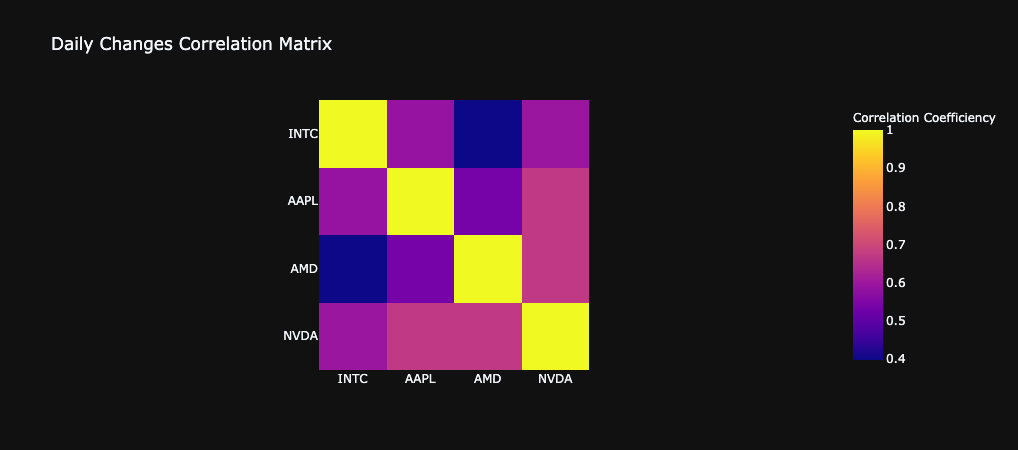

5 Use an optimiser
Iteration limit reached    (Exit mode 9)
            Current function value: 0.3996123134214688
            Iterations: 100
            Function evaluations: 1456
            Gradient evaluations: 100
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: 0.39961231342149345
            Iterations: 6
            Function evaluations: 10
            Gradient evaluations: 2
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: 0.39961231342147047
            Iterations: 8
            Function evaluations: 40
            Gradient evaluations: 4
Completed Generating 3 Portfolios
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.37563434047169914
            Iterations: 2
            Function evaluations: 10
            Gradient evaluations: 2
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3519291

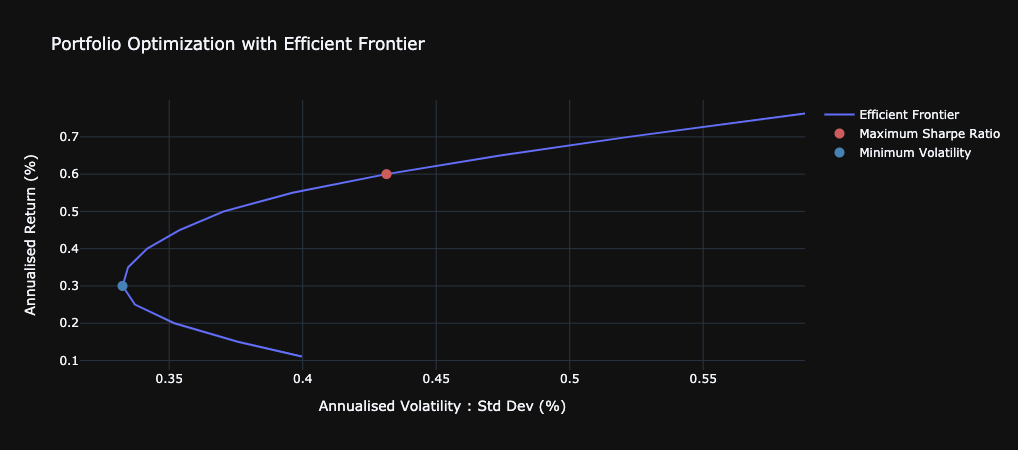

5.1 Allocation for Mar Sharpe and Min Volatility


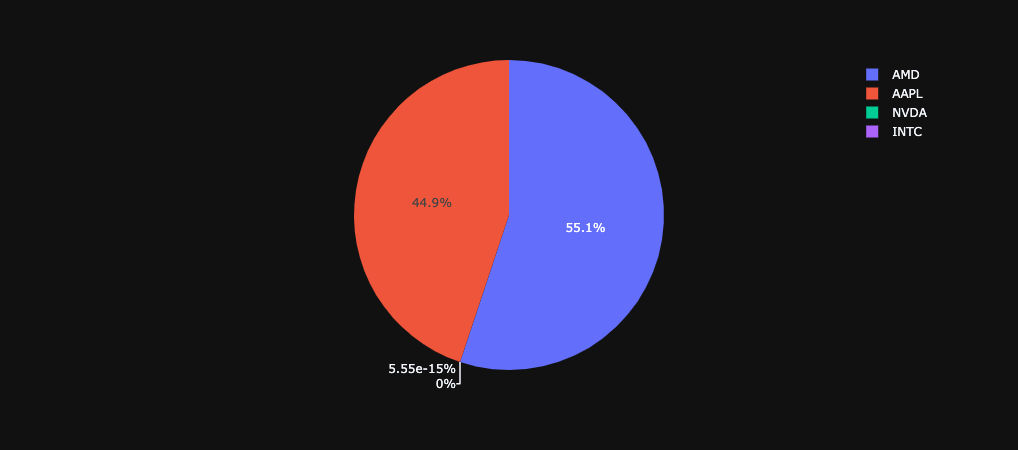

6 Add random data by monte carlo


In [7]:
generate_optimum_portfolio()